2. Лабороторная работа.
Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
## Цель лабораторной работы: 
    изучение способов предварительной обработки данных для дальнейшего формирования моделей.

## Требования к отчету:
Отчет по лабораторной работе должен содержать:
    1.титульный лист;
    2.описание задания;
    3.текст программы;
    4. экранные формы с примерами выполнения программы.

## Задание:
    1.Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
    2.Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
        2.1 обработку пропусков в данных;
        2.2 кодирование категориальных признаков;
        2.3 масштабирование данных.
## Ход работы:

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

#### В качестве датасета будем использовать данные о птицах и их средах обитания с некоторыми пропущенными значениями.

In [7]:
data = pd.read_csv('bird.csv', sep=",")

In [8]:
data.shape

(420, 12)

In [9]:
data.dtypes

id         int64
huml     float64
humw     float64
ulnal    float64
ulnaw    float64
feml     float64
femw     float64
tibl     float64
tibw     float64
tarl     float64
tarw      object
type      object
dtype: object

#### Посмотрим датасет на наличие пропусков

In [10]:
data.isnull().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

#### Проверим правильность загрузки данных

In [11]:
data.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,'?',SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


### Обработка пропусков:

#### 1. Удаление колонок с пустыми значениями


In [12]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape) 

((420, 12), (420, 2))

#### 2) Удаление строк, содержащих пустые значения

In [13]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((420, 12), (413, 12))

#### 3) Заполнение всех пустых значений 0


In [14]:
data_new_3 = data.fillna(0)
data_new_3.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,'?',SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


### "Внедрение значений" - импьютация
#### Обработка пропусков в числовых данных
Выведем информацию по числовым колонкам, содержащим пустые значения:

In [15]:
num_cols = []
total_count = 205
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка huml. Тип данных float64. Количество пустых значений 1, 0.49%.
Колонка humw. Тип данных float64. Количество пустых значений 1, 0.49%.
Колонка ulnal. Тип данных float64. Количество пустых значений 3, 1.46%.
Колонка ulnaw. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка feml. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка femw. Тип данных float64. Количество пустых значений 1, 0.49%.
Колонка tibl. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка tibw. Тип данных float64. Количество пустых значений 1, 0.49%.
Колонка tarl. Тип данных float64. Количество пустых значений 1, 0.49%.


In [16]:
data_num = data[num_cols]
data_num

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88
...,...,...,...,...,...,...,...,...,...
415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99
416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60
417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86
418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98


Запоминаем индексы строк с пустыми значениями


In [17]:
flt_index = data[data['ulnal'].isnull()].index
flt_index

Int64Index([204, 342, 378], dtype='int64')

Проверяем

In [19]:
data[data.index.isin(flt_index)]

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
204,204,63.76,4.74,NaN,NaN,57.33,4.88,75.67,4.33,60.19,3.82,R
342,342,NaN,NaN,NaN,NaN,32.54,2.65,55.06,2.81,38.94,2.25,SO
378,378,20.10,1.86,NaN,1.52,17.21,1.22,NaN,NaN,18.46,0.91,SO


используем импьютацию из библиотеки scikit-learn:

In [20]:
data_num_price = data_num[['ulnal']]
data_num_price.head()

,ulnal
0,72.01
1,80.53
2,69.26
3,65.76
4,52.09


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator 

Проверка:

In [22]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_price)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Используем различные методы:

In [24]:
strategies=['mean', 'median','most_frequent']

In [27]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_price)
    return data_num_imp[mask_missing_values_only]

In [28]:
strategies[0], test_num_impute(strategies[0])

('mean', array([69.1153717, 69.1153717, 69.1153717]))

In [29]:
strategies[1], test_num_impute(strategies[1])

('median', array([43.71, 43.71, 43.71]))

In [30]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([142., 142., 142.]))

In [32]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [33]:
data[['ulnal']].describe()

,ulnal
count,417.000000
mean,69.115372
std,58.784775
min,14.090000
25%,28.050000
50%,43.710000
75%,97.520000
max,422.000000


In [34]:
test_num_impute_col(data, 'ulnal', strategies[0])

('ulnal', 'mean', 3, 69.1153717026379, 69.1153717026379)

In [35]:
test_num_impute_col(data, 'ulnal', strategies[1])

('ulnal', 'median', 3, 43.71, 43.71)

In [36]:
test_num_impute_col(data, 'ulnal', strategies[2])

('ulnal', 'most_frequent', 3, 142.0, 142.0)

### Обработка пропусков категориальных данных 

In [37]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка tarw. Тип данных object. Количество пустых значений 1, 0.49%.


In [38]:
cat_temp_data = data[['tarw']]
cat_temp_data.head()

,tarw
0,'?'
1,4.01
2,3.34
3,3.41
4,3.13


In [39]:
cat_temp_data['tarw'].unique()

array(["'?'", '4.01', '3.34', '3.41', '3.13', '2.83', '3.64', '3.81',
       '4.37', '6.34', '6.63', '4.59', '5.5', '4.24', '3.36', '3.52',
       '3.53', '3.28', '3.06', '3.35', '2.69', '4.25', '3.84', '1.97',
       '2.28', '10.73', '10.24', '9.45', '13.82', '14.09', '3.65', '6.51',
       '7.16', '6.3', '6.64', '6.41', '7.21', '8.91', '10.05', '4.82',
       '5.07', '6.7', '6.91', '5.1', '4.93', '6.02', '8.79', '8.23',
       '7.97', '8.41', '7.44', '7.87', '1.72', '1.77', '2.03', '7.69',
       '7.04', '8.93', '6.13', '7.55', '1.83', '2.52', '1.31', '2.82',
       '2.76', '1.13', '1.09', '1.2', '1.36', '0.83', '0.88', '1.92',
       '2.99', '3.33', '3.48', '3.22', '1.73', '1.56', '2.14', '2.23',
       '3.82', '4.07', '2.75', '2.94', '3.23', '2.66', '2.38', '2.47',
       '1.9', '1.99', '3.0', '2.89', '2.2', '3.12', '2.95', '2.0', '2.25',
       '1.63', '2.37', '2.05', '2.98', '3.03', '1.91', '2.22', '3.2',
       '2.08', '1.89', '6.77', '7.0', '3.02', '3.79', '4.74', '5.12',
     

In [40]:
cat_temp_data[cat_temp_data['tarw'].isnull()].shape

(1, 1)

Импьютация наиболее частыми значениями

In [41]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([["'?'"],
       ['4.01'],
       ['3.34'],
       ['3.41'],
       ['3.13'],
       ['2.83'],
       ['3.64'],
       ['3.81'],
       ['4.37'],
       ['6.34'],
       ['6.63'],
       ['4.59'],
       ['5.5'],
       ['4.24'],
       ['3.36'],
       ['3.52'],
       ['3.53'],
       ['3.28'],
       ['3.06'],
       ['3.35'],
       ['2.69'],
       ['4.25'],
       ['3.84'],
       ['1.97'],
       ['2.28'],
       ['2.83'],
       ['10.73'],
       ['10.24'],
       ['9.45'],
       ['13.82'],
       ['14.09'],
       ['3.65'],
       ['6.51'],
       ['7.16'],
       ['6.3'],
       ['6.64'],
       ['6.41'],
       ['7.21'],
       ['8.91'],
       ['10.05'],
       ['4.82'],
       ['5.07'],
       ['6.7'],
       ['6.91'],
       ['5.1'],
       ['4.93'],
       ['6.02'],
       ['8.79'],
       ['8.23'],
       ['7.97'],
       ['8.41'],
       ['7.44'],
       ['7.87'],
       ['1.72'],
       ['1.77'],
       ['2.03'],
       ['7.69'],
       ['7.04'],
       ['8.93'

In [42]:
np.unique(data_imp2)

array(["'?'", '0.66', '0.69', '0.73', '0.74', '0.75', '0.78', '0.79',
       '0.8', '0.81', '0.83', '0.86', '0.88', '0.89', '0.91', '0.92',
       '0.94', '0.96', '0.97', '0.98', '1.0', '1.01', '1.02', '1.04',
       '1.05', '1.06', '1.08', '1.09', '1.11', '1.12', '1.13', '1.14',
       '1.15', '1.16', '1.18', '1.2', '1.21', '1.22', '1.23', '1.24',
       '1.25', '1.26', '1.27', '1.28', '1.29', '1.31', '1.32', '1.33',
       '1.34', '1.36', '1.37', '1.39', '1.4', '1.41', '1.42', '1.43',
       '1.45', '1.46', '1.47', '1.48', '1.51', '1.52', '1.53', '1.54',
       '1.55', '1.56', '1.57', '1.58', '1.6', '1.61', '1.62', '1.63',
       '1.64', '1.65', '1.67', '1.69', '1.7', '1.71', '1.72', '1.73',
       '1.76', '1.77', '1.78', '1.79', '1.8', '1.81', '1.83', '1.85',
       '1.88', '1.89', '1.9', '1.91', '1.92', '1.93', '1.95', '1.97',
       '1.98', '1.99', '10.05', '10.24', '10.73', '13.82', '14.09', '2.0',
       '2.03', '2.05', '2.06', '2.08', '2.1', '2.12', '2.14', '2.16',
       '2.19

Импьютация константой:

In [43]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='const')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([["'?'"],
       ['4.01'],
       ['3.34'],
       ['3.41'],
       ['3.13'],
       ['2.83'],
       ['3.64'],
       ['3.81'],
       ['4.37'],
       ['6.34'],
       ['6.63'],
       ['4.59'],
       ['5.5'],
       ['4.24'],
       ['3.36'],
       ['3.52'],
       ['3.53'],
       ['3.28'],
       ['3.06'],
       ['3.35'],
       ['2.69'],
       ['4.25'],
       ['3.84'],
       ['1.97'],
       ['2.28'],
       ['2.83'],
       ['10.73'],
       ['10.24'],
       ['9.45'],
       ['13.82'],
       ['14.09'],
       ['3.65'],
       ['6.51'],
       ['7.16'],
       ['6.3'],
       ['6.64'],
       ['6.41'],
       ['7.21'],
       ['8.91'],
       ['10.05'],
       ['4.82'],
       ['5.07'],
       ['6.7'],
       ['6.91'],
       ['5.1'],
       ['4.93'],
       ['6.02'],
       ['8.79'],
       ['8.23'],
       ['7.97'],
       ['8.41'],
       ['7.44'],
       ['7.87'],
       ['1.72'],
       ['1.77'],
       ['2.03'],
       ['7.69'],
       ['7.04'],
       ['8.93'

#### Преобразование категориальных признаков в числовые:

In [44]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,'?'
1,4.01
2,3.34
3,3.41
4,3.13
...,...
415,1.15
416,1.15
417,1.21
418,1.24


#### Кодирование категорий целочисленными значениями

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [46]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1']) 

In [47]:
cat_enc['c1'].unique()

array(["'?'", '4.01', '3.34', '3.41', '3.13', '2.83', '3.64', '3.81',
       '4.37', '6.34', '6.63', '4.59', '5.5', '4.24', '3.36', '3.52',
       '3.53', '3.28', '3.06', '3.35', '2.69', '4.25', '3.84', '1.97',
       '2.28', '10.73', '10.24', '9.45', '13.82', '14.09', '3.65', '6.51',
       '7.16', '6.3', '6.64', '6.41', '7.21', '8.91', '10.05', '4.82',
       '5.07', '6.7', '6.91', '5.1', '4.93', '6.02', '8.79', '8.23',
       '7.97', '8.41', '7.44', '7.87', '1.72', '1.77', '2.03', '7.69',
       '7.04', '8.93', '6.13', '7.55', '1.83', '2.52', '1.31', '2.82',
       '2.76', '1.13', '1.09', '1.2', '1.36', '0.83', '0.88', '1.92',
       '2.99', '3.33', '3.48', '3.22', '1.73', '1.56', '2.14', '2.23',
       '3.82', '4.07', '2.75', '2.94', '3.23', '2.66', '2.38', '2.47',
       '1.9', '1.99', '3.0', '2.89', '2.2', '3.12', '2.95', '2.0', '2.25',
       '1.63', '2.37', '2.05', '2.98', '3.03', '1.91', '2.22', '3.2',
       '2.08', '1.89', '6.77', '7.0', '3.02', '3.79', '4.74', '5.12',
     

In [48]:
np.unique(cat_enc_le) 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [49]:
le.inverse_transform([0, 1])

array(["'?'", '0.66'], dtype=object)

#### Кодирование категорий наборами бинарных значений:

In [50]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [51]:
cat_enc.shape

(420, 1)

In [52]:
cat_enc_ohe.shape

(420, 280)

In [53]:
cat_enc_ohe

<420x280 sparse matrix of type '<class 'numpy.float64'>'
	with 420 stored elements in Compressed Sparse Row format>

In [54]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
cat_enc.head(10)

,c1
0,'?'
1,4.01
2,3.34
3,3.41
4,3.13
5,2.83
6,3.64
7,3.81
8,4.37
9,6.34


#### Масштабирование данных

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

#### MinMax масштабирование

In [57]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['ulnal']])

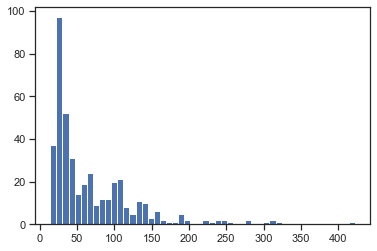

In [58]:
plt.hist(data['ulnal'], 50)
plt.show()

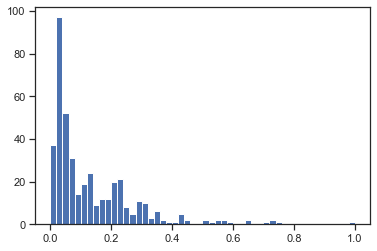

In [59]:
plt.hist(sc1_data, 50)
plt.show()

#### Масштабирование данных на основе Z-оценки

In [60]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['ulnal']]) 

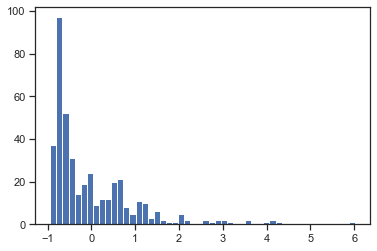

In [61]:
plt.hist(sc2_data, 50)
plt.show()